In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print("Dataset loaded successfully.\n")
except Exception as e:
    print("Error loading dataset:", e)

# Display first few rows
print(df.head())

# Explore the structure
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Clean the dataset (in this case, no missing values)
df_cleaned = df.dropna()


Dataset loaded successfully.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Types:
 sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [3]:
# Basic statistics
print("\nBasic Statistics:\n", df_cleaned.describe())

# Grouping by species and calculating mean of numerical columns
grouped_means = df_cleaned.groupby('species').mean()
print("\nMean values per species:\n", grouped_means)

# Interesting finding (example observation)
print("\nObservation:")
print("Versicolor species tends to have wider petals than Setosa, but not as wide as Virginica.")



Basic Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Mean values per species:
             sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                        

C:\Users\admin\AppData\Local\Temp\ipykernel_16120\1907029252.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df_cleaned.groupby('species').mean()


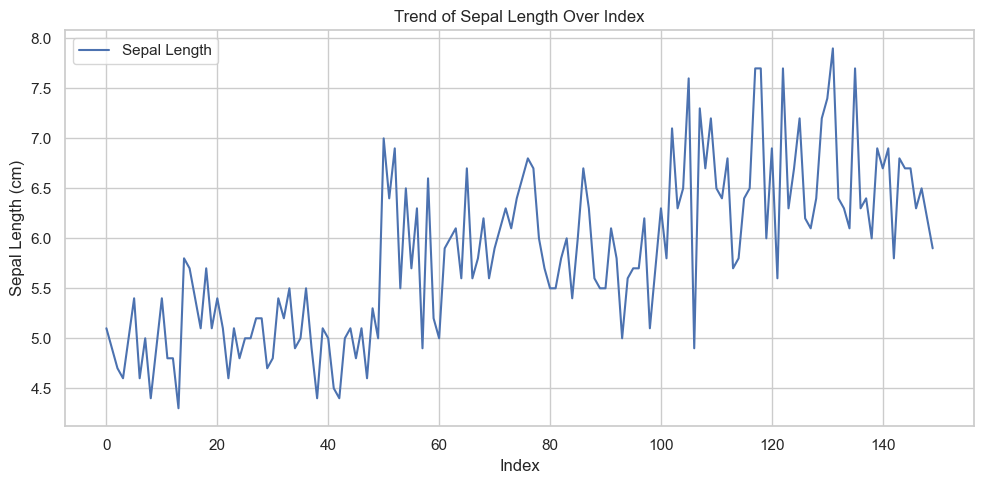

C:\Users\admin\AppData\Local\Temp\ipykernel_16120\1585264522.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df_cleaned, ci=None)


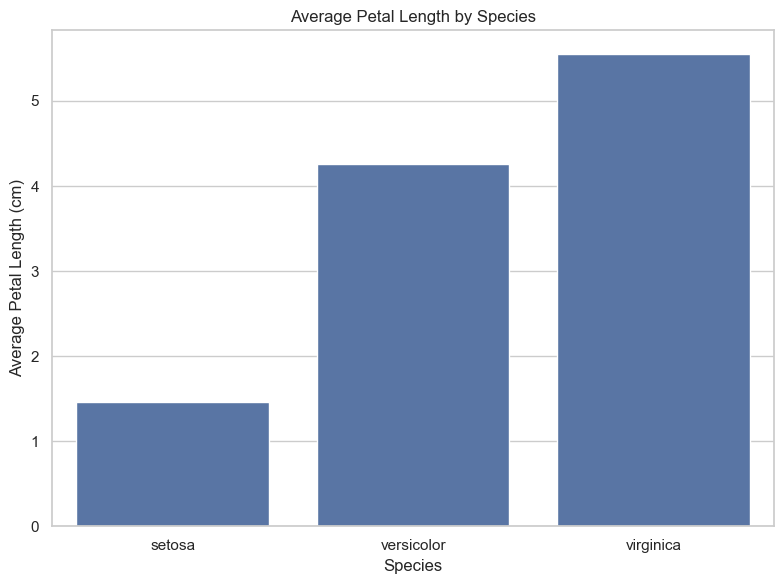

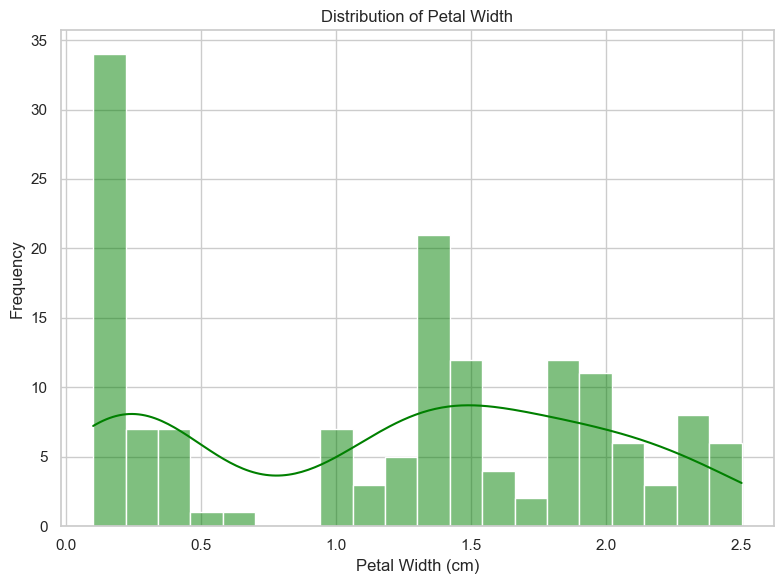

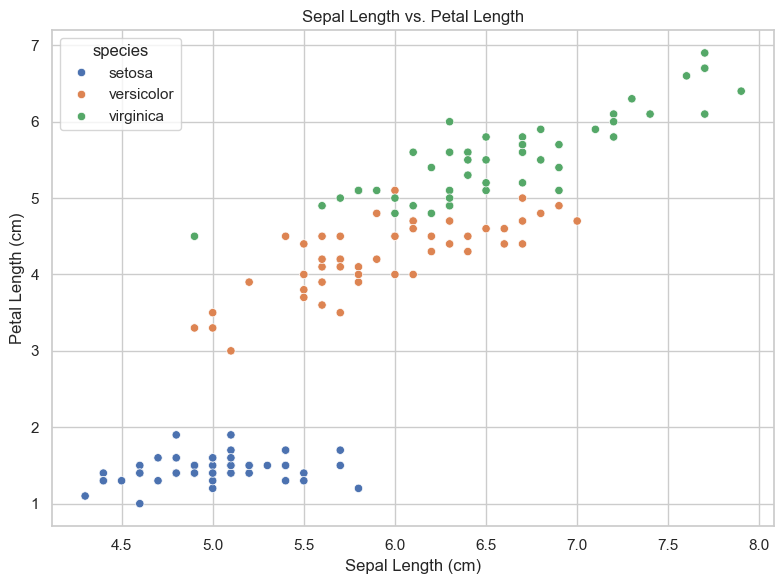

In [5]:
# Set seaborn style
sns.set(style="whitegrid")

# 1. Line chart - Simulate a time-series-like trend by index
plt.figure(figsize=(10, 5))
plt.plot(df_cleaned.index, df_cleaned['sepal length (cm)'], label='Sepal Length')
plt.title('Trend of Sepal Length Over Index')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar chart - Average petal length per species
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal length (cm)', data=df_cleaned, ci=None)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.tight_layout()
plt.show()

# 3. Histogram - Distribution of petal width
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['petal width (cm)'], bins=20, kde=True, color='green')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter plot - Sepal length vs. petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.tight_layout()
plt.show()
